### Support vector regression


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#### importing the dataset

In [2]:
dataset = pd.read_csv('Position_Salaries.csv')

In [3]:
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [4]:
X = dataset.iloc[:, 1:2].values

In [5]:
y = dataset.iloc[:, 2:].values

#### Feature scaling

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
sc_X = StandardScaler()

In [8]:
sc_y = StandardScaler()

In [9]:
X = sc_X.fit_transform(X)

/home/carlo/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [10]:
y = sc_y.fit_transform(y)

/home/carlo/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


#### Fitting SVR to the dataset

In [11]:
from sklearn.svm import SVR

In [12]:
regressor = SVR(kernel = 'rbf')

In [13]:
regressor.fit(X, y)

/home/carlo/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

Text(0,0.5,'Salary')

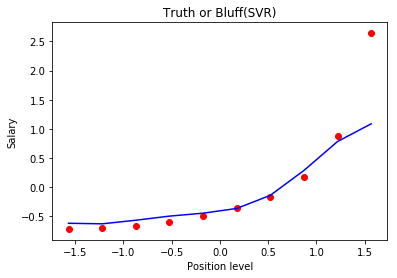

In [14]:
#visualizing data
plt.scatter(X, y, color='red')
plt.plot(X, regressor.predict(X),color='blue')
plt.title('Truth or Bluff(SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')

#### Predicting the result, the salary must be close to 160k if we put 6.5

In [15]:
y_pred = sc_y.inverse_transform(regressor.predict(sc_X.transform(np.array([[6.5]]))))

In [16]:
y_pred #close enough

array([170370.0204065])